In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('../dataframe2.xlsx', sheet_name='Sheet1')
df

,Unnamed: 0,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,double,vowel,cumDup,cumVowel,percentage of hard mode,uncommonwords,easywords,easywordsband,hardwords,hardwordsband
0,NaN,560,manly,20380,1899,0,2,17,37,29,...,0,0,0,1,9.317959,0,19,"(3.94, 19.0]",14,"(1.932, 19.0]"
1,NaN,559,molar,21204,1973,0,4,21,38,26,...,0,1,0,2,9.304848,0,25,"(19.0, 34.0]",10,"(1.932, 19.0]"
2,NaN,558,havoc,20001,1919,0,2,16,38,30,...,0,1,0,2,9.594520,0,18,"(3.94, 19.0]",14,"(1.932, 19.0]"
3,NaN,557,impel,20160,1937,0,3,21,40,25,...,0,1,0,2,9.608135,0,24,"(19.0, 34.0]",10,"(1.932, 19.0]"
4,NaN,556,condo,20879,2012,0,2,17,35,29,...,1,1,1,2,9.636477,0,19,"(3.94, 19.0]",17,"(1.932, 19.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,NaN,206,drink,153880,3017,1,9,35,34,16,...,0,0,0,1,1.960619,0,45,"(34.0, 49.0]",6,"(1.932, 19.0]"
355,NaN,205,query,107134,2242,1,4,16,30,30,...,0,1,0,2,2.092706,0,21,"(19.0, 34.0]",19,"(1.932, 19.0]"
356,NaN,204,gorge,91477,1913,1,3,13,27,30,...,1,1,1,2,2.091236,0,17,"(3.94, 19.0]",26,"(19.0, 36.0]"
357,NaN,203,crank,101503,1763,1,5,23,31,24,...,0,0,0,1,1.736894,0,29,"(19.0, 34.0]",16,"(1.932, 19.0]"


In [233]:
df.drop(['Unnamed: 0','percentage of hard mode','%','easywords','hardwords','easywordsband','hardwordsband'], axis=1, inplace=True)
df = df.sort_values('Contest number', ascending=True)
df.drop('Contest number', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
data = df.iloc[:, 1:10].copy().reset_index()
data

,index,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,0,80630,1362,1,3,23,39,24,9,1
1,1,101503,1763,1,5,23,31,24,14,2
2,2,91477,1913,1,3,13,27,30,22,4
3,3,107134,2242,1,4,16,30,30,17,2
4,4,153880,3017,1,9,35,34,16,5,1
...,...,...,...,...,...,...,...,...,...,...
354,354,20879,2012,0,2,17,35,29,14,3
355,355,20160,1937,0,3,21,40,25,9,1
356,356,20001,1919,0,2,16,38,30,12,2
357,357,21204,1973,0,4,21,38,26,9,1


In [234]:
data = data.iloc[:, 1:2].copy()
data

,Number of reported results
0,80630
1,101503
2,91477
3,107134
4,153880
...,...
354,20879
355,20160
356,20001
357,21204


<Figure size 500x300 with 0 Axes>

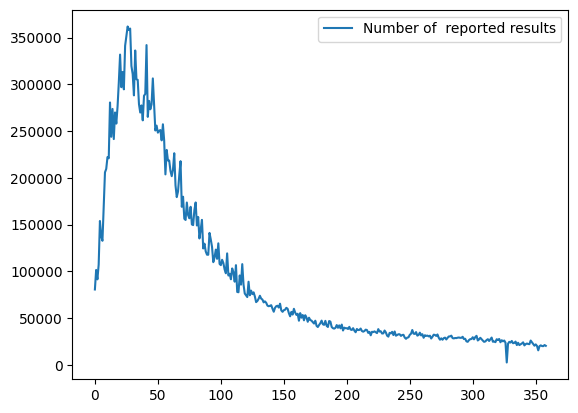

In [235]:
plt.figure(figsize=(5, 3))
data[:].plot()
plt.show()

In [236]:
def difference(data_set,interval=1):
    diff=list()
    for i in range(interval,len(data_set)):
        value=data_set[i]-data_set[i-interval]
        diff.append(value)
    return pd.Series(diff)
 
# 这里的series是之前数据预处理后得到的DateFrame型数据
raw_value=data.values
data_diff=difference(raw_value,1)
data_diff

0       [20873]
1      [-10026]
2       [15657]
3       [46746]
4      [-16294]
         ...   
353       [868]
354      [-719]
355      [-159]
356      [1203]
357      [-824]
Length: 358, dtype: object

In [237]:
def timeseries_to_supervised(data,lag=1):
    df=pd.DataFrame(data)
    columns=[df.shift(1)]
    columns.append(df)
    df=pd.concat(columns,axis=1)
    df.fillna(0,inplace=True)
    return df
 
seq=timeseries_to_supervised(data_diff, 1)
data_seq=seq.values
data_seq

array([[0, array([20873], dtype=int64)],
       [array([20873], dtype=int64), array([-10026], dtype=int64)],
       [array([-10026], dtype=int64), array([15657], dtype=int64)],
       [array([15657], dtype=int64), array([46746], dtype=int64)],
       [array([46746], dtype=int64), array([-16294], dtype=int64)],
       [array([-16294], dtype=int64), array([-4860], dtype=int64)],
       [array([-4860], dtype=int64), array([36758], dtype=int64)],
       [array([36758], dtype=int64), array([36396], dtype=int64)],
       [array([36396], dtype=int64), array([3729], dtype=int64)],
       [array([3729], dtype=int64), array([12588], dtype=int64)],
       [array([12588], dtype=int64), array([-1247], dtype=int64)],
       [array([-1247], dtype=int64), array([59672], dtype=int64)],
       [array([59672], dtype=int64), array([-36658], dtype=int64)],
       [array([-36658], dtype=int64), array([29763], dtype=int64)],
       [array([29763], dtype=int64), array([-32238], dtype=int64)],
       [array([-

In [238]:
test_ratio=0.2
train_size=int(len(data_seq)*(1-test_ratio))
test_size = len(data_seq) - train_size
data_train,data_test=data_seq[0:train_size],data_seq[train_size:len(data_seq)]
data_train

array([[0, array([20873], dtype=int64)],
       [array([20873], dtype=int64), array([-10026], dtype=int64)],
       [array([-10026], dtype=int64), array([15657], dtype=int64)],
       [array([15657], dtype=int64), array([46746], dtype=int64)],
       [array([46746], dtype=int64), array([-16294], dtype=int64)],
       [array([-16294], dtype=int64), array([-4860], dtype=int64)],
       [array([-4860], dtype=int64), array([36758], dtype=int64)],
       [array([36758], dtype=int64), array([36396], dtype=int64)],
       [array([36396], dtype=int64), array([3729], dtype=int64)],
       [array([3729], dtype=int64), array([12588], dtype=int64)],
       [array([12588], dtype=int64), array([-1247], dtype=int64)],
       [array([-1247], dtype=int64), array([59672], dtype=int64)],
       [array([59672], dtype=int64), array([-36658], dtype=int64)],
       [array([-36658], dtype=int64), array([29763], dtype=int64)],
       [array([29763], dtype=int64), array([-32238], dtype=int64)],
       [array([-

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def scale(train,test):
    # 创建一个缩放器，将数据集中的数据缩放到[-1,1]的取值范围中
    scaler=MinMaxScaler(feature_range=(-1,1))
    # 使用缩放器来将训练集和测试集进行缩放
    train_scaled=scaler.fit_transform(train)
    test_scaled=scaler.fit_transform(test)
    return scaler,train_scaled,test_scaled
 
scaler,train_scaled,test_scaled=scale(data_train,data_test)

In [ ]:
X,y=data_train[:,0:-1],data_train[:,-1]
X=X.reshape(X.shape[0],1,X.shape[1])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU

def fit_lstm(data_train,batch_size,nb_epoch,neurons):
    # 将数据对中的x和y分开
    X,y=data_train[:,0:-1],data_train[:,-1]
    # 将2D数据拼接成3D数据，形状为[N*1*1]
    X=X.reshape(X.shape[0],1,X.shape[1])
 
    model=Sequential()
    model.add(GRU(neurons,batch_input_shape=(1,X.shape[1],X.shape[2]),stateful=True))
    model.add(Dense(1))
 
    model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mse'])
    for i in range(nb_epoch):
        # shuffle是不混淆数据顺序
        his=model.fit(X,y,batch_size=batch_size,verbose=1,shuffle=False)
        # 每训练完一次就重置一次网络状态，网络状态与网络权重不同
        model.reset_states()
    return model
 
# 构建一个LSTM模型并训练，样本数为1，训练次数为3，LSTM层神经元个数为4
lstm_model=fit_lstm(train_scaled,batch_size=1,nb_epoch=3,neurons=4)

In [ ]:
def forecast_lstm(model,batch_size,X):
    # 将形状为[1:]的，包含一个元素的一维数组X，转换形状为[1,1,1]的3D张量
    X=X.reshape(1,1,len(X)).astype('int32')
    # 输出形状为1行一列的二维数组yhat
    yhat=model.predict(X,batch_size=batch_size)
    # 将yhat中的结果返回
    return yhat[0,0]
 
# # 取出测试集中的一条数据，并将其拆分为X和y
# X,y=data_test[i,0:-1],data_test[i,-1]
# # 将训练好的模型、测试数据传入预测函数中
# yhat=forecast_lstm(lstm_model,1,X)

In [ ]:
# 对预测的数据进行逆差分转换
def invert_difference(history,yhat,interval=1):
    return yhat+history[-interval]
 
# 将预测值进行逆缩放，使用之前训练好的缩放器，x为一维数组，y为实数
def invert_scale(scaler,X,y):
    # 将X,y转换为一个list列表
    new_row=[x for x in X]+[y]
    # 将列表转换为数组
    array=np.array(new_row)
    # 将数组重构成一个形状为[1,2]的二维数组->[[10,12]]
    array=array.reshape(1,len(array))
    # 逆缩放输入的形状为[1,2]，输出形状也是如此
    invert=scaler.inverse_transform(array)
    # 只需要返回y值即可
    return invert[0,-1]

In [ ]:
predictions=list()
prediction_pre = list()
for i in range(len(test_scaled)):
    # 将测试集拆分为X和y
    X,y=data_test[i,0:-1],data_test[i,-1]
    # 将训练好的模型、测试数据传入预测函数中
    yhat=forecast_lstm(lstm_model,1,X)
    # 将预测值进行逆缩放
    yhat=invert_scale(scaler,X,yhat)
    # 对预测的y值进行逆差分
    yhat=invert_difference(raw_value,yhat,len(test_scaled)+1-i)
    # 存储正在预测的y值
    predictions.append(yhat)

In [ ]:
plt.plot(raw_value[:])
predictions = np.zeros(train_size).tolist()+predictions
plt.plot(predictions)
plt.legend(['true','pred'])
plt.show()